In [2]:
#Header part
import scipy.stats as sts
import sympy as sp
import scipy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math

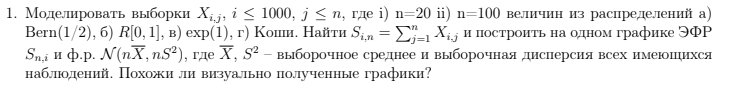

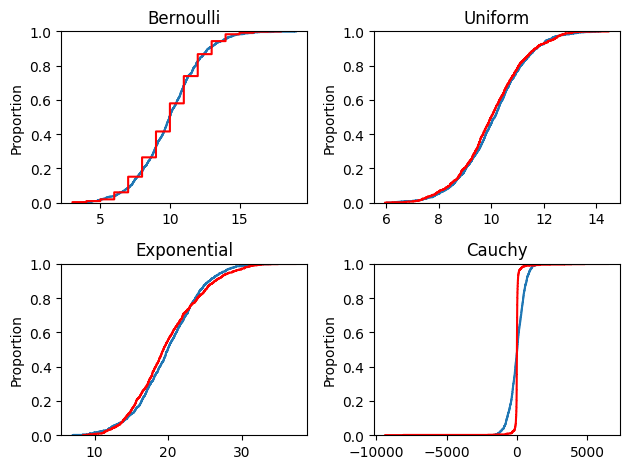

In [ ]:
rvsBern = sts.bernoulli(1/2).rvs
rvsUniform = sts.uniform().rvs
rvsExp = sts.expon().rvs
rvsCauchy = sts.cauchy().rvs

n = 20
MatrixBern = sc.sparse.random(1000,n, density=1, data_rvs = rvsBern)
MatrixUniform = sc.sparse.random(1000,n, density=1, data_rvs = rvsUniform)
MatrixExp = sc.sparse.random(1000,n, density=1, data_rvs = rvsExp)
MatrixCauchy = sc.sparse.random(1000,n, density=1, data_rvs = rvsCauchy)

MatrixBern = MatrixBern.toarray()
MatrixUniform = MatrixUniform.toarray()
MatrixExp = MatrixExp.toarray()
MatrixCauchy = MatrixCauchy.toarray()

S_Bern = np.sum(MatrixBern, axis = 1)
S_Uniform = np.sum(MatrixUniform, axis = 1)
S_Exp = np.sum(MatrixExp, axis = 1)
S_Cauchy = np.sum(MatrixCauchy, axis = 1)

plt.figure()
plt.subplot(2,2,1)

plt.title("Bernoulli")
sns.ecdfplot(np.random.normal(n*MatrixBern.mean(), np.sqrt(n*MatrixBern.var()), 1000))
sns.ecdfplot(S_Bern, c='red')

plt.subplot(2,2,2)
plt.title("Uniform")
sns.ecdfplot(np.random.normal(n*MatrixUniform.mean(), np.sqrt(n*MatrixUniform.var()), 1000))
sns.ecdfplot(S_Uniform, c='red')

plt.subplot(2,2,3)
plt.title("Exponential")
sns.ecdfplot(np.random.normal(n*MatrixExp.mean(), np.sqrt(n*MatrixExp.var()), 1000))
sns.ecdfplot(S_Exp, c='red')

plt.subplot(2,2,4)
plt.title("Cauchy")
sns.ecdfplot(np.random.normal(n*MatrixCauchy.mean(), np.sqrt(n*MatrixCauchy.var()), 1000))
sns.ecdfplot(S_Cauchy, c='red')

plt.tight_layout()

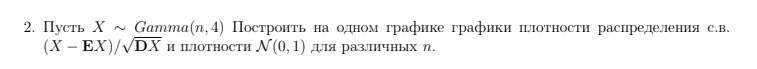

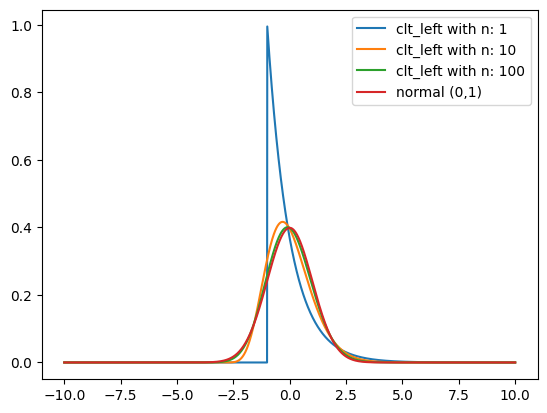

In [ ]:
fig, ax = plt.subplots()
x_values = np.linspace(-10, 10, 2000)
def graph_rvsgamma_n(n):
    x_values = np.linspace(-10, 10, 2000)
    rvsGamma = sts.gamma(a = n,scale=4)
    rvs = np.sqrt(rvsGamma.var())*sts.gamma.pdf(x = x_values * np.sqrt(rvsGamma.var()) +  rvsGamma.mean(), a = n, scale = 4)
    ax.plot(x_values, rvs, label = ("clt_left with n: %d"%n))
graph_rvsgamma_n(1)
graph_rvsgamma_n(10)
graph_rvsgamma_n(100)
ax.plot(x_values, sts.norm.pdf(x_values, 0, 1), label="normal (0,1)")
plt.legend()

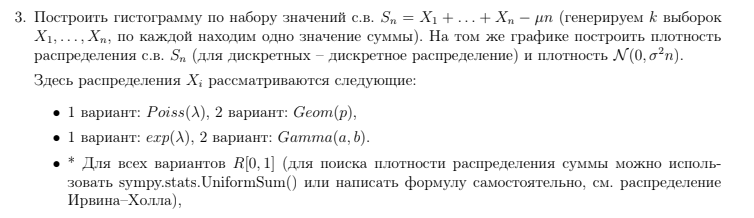

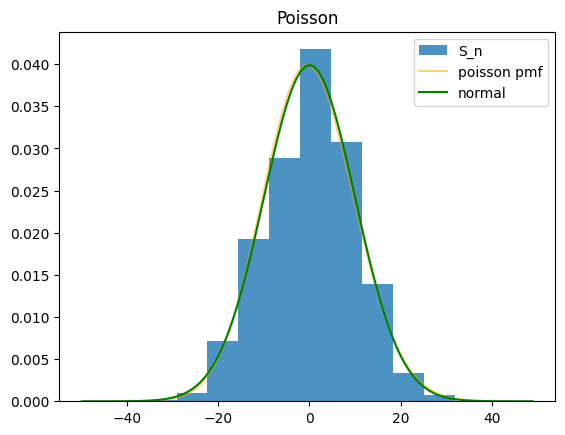

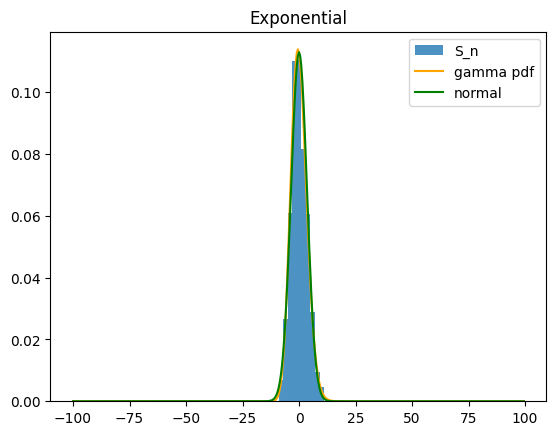

In [4]:
l = 2
n = 50
k = 1000
mu = sts.poisson(l).mean()
disp = np.sqrt(sts.poisson(l).var() * n)

rvsPoiss = sts.poisson(l).rvs
MatrixPoiss = sc.sparse.random(k,n, density=1, data_rvs = rvsPoiss).toarray()
PoissArray = []
for i in range (k):
    PoissArray.append(np.sum(MatrixPoiss[i][:]) - n * sts.poisson(l).mean())
np.array(PoissArray)

fig, ax = plt.subplots()
plt.title("Poisson")
x = np.arange(-50, 50, 1)
y = sts.poisson.pmf(x, n*l, loc = -mu*n)
ax.hist(PoissArray, density=True, label = "S_n", alpha = 0.8)
ax.plot(x, y, alpha = 0.5, label = "poisson pmf", color='orange')
ax.plot(x, sts.norm.pdf(x, 0, disp), label = "normal", color='green')
plt.legend()

######################################################################
mu1 = sts.expon(scale = 1.0 / l).mean()
disp1 = np.sqrt(sts.expon(scale = 1.0 / l).var() * n)

rvsExp = sts.expon(scale = 1.0 / l).rvs
MatrixExp = sc.sparse.random(k,n, density=1, data_rvs = rvsExp).toarray()
ExpArray = []
for i in range (k):
    ExpArray.append(np.sum(MatrixExp[i][:]) - n * sts.expon(scale = 1.0 / l).mean())
np.array(ExpArray)

fig1, ax1 = plt.subplots()
plt.title("Exponential")
x1 = np.arange(-100, 100, 0.5)
y1 = sts.gamma.pdf(x1, a = n, scale = 1.0 / l, loc= -mu1*n)
ax1.hist(ExpArray, density=True, label = "S_n", alpha = 0.8)
ax1.plot(x1, y1, alpha = 1, label = "gamma pdf", color='orange')
ax1.plot(x1, sts.norm.pdf(x1, 0, disp1), label = "normal", color='green')
plt.legend()

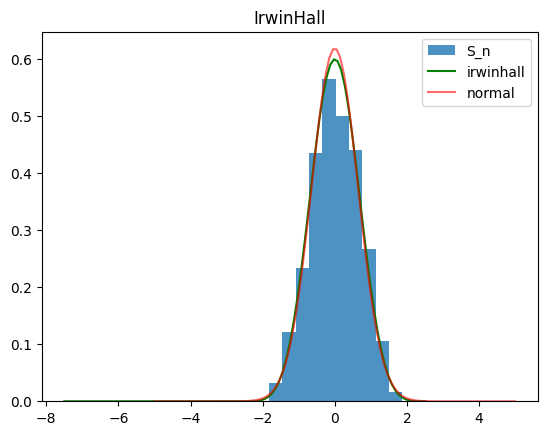

In [8]:
################################### IrwinHall ###################################
from math import factorial
def IrwinHallDensity(n: int, x:float):
  s = 0
  for i in range (n+1):
    C = sc.special.comb(n,i)
    if (x - i >= 0):
      s += (-1)**(i) * C * (x - i)**(n-1) * (1/factorial(n-1))
  return s
n = 5
mu2 = sts.uniform().mean()
disp2 = np.sqrt(sts.uniform().var() * n)
rvsUniform = sts.uniform().rvs
MatrixUniform = sc.sparse.random(k,n, density=1, data_rvs = rvsUniform).toarray()
UniformArray = []
for i in range (k):
    UniformArray.append(np.sum(MatrixUniform[i][:]) - n * sts.uniform().mean())
np.array(UniformArray)

fig2, ax2 = plt.subplots()
plt.title("IrwinHall")
x_values = np.linspace(-5, 5, 100)
irwin = np.array([IrwinHallDensity(n,y) for y in x_values])
ax2.hist(UniformArray, density=True, label = "S_n", alpha = 0.8)
ax2.plot(x_values-mu2*n, irwin, label = "irwinhall", color = 'green')
ax2.plot(x_values, sts.norm.pdf(x_values, 0, disp2), label = "normal", color='red', alpha = 0.6)
plt.legend()


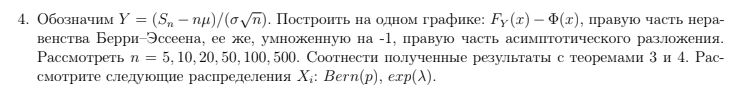

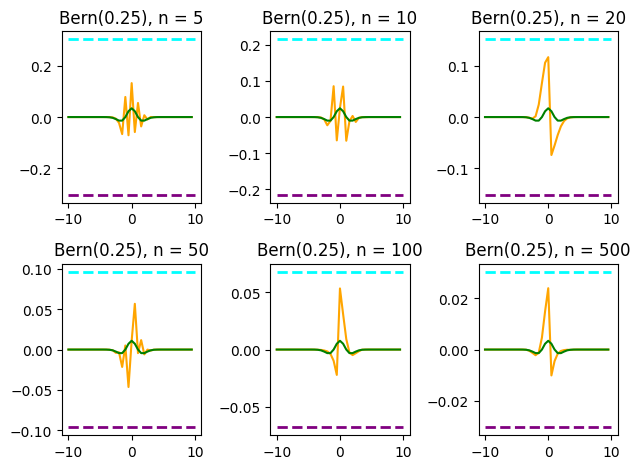

In [ ]:
############################### BERNOULLI ###########################
p = 1/4
def asympt(x, skewness, n):
    return skewness / (6 * np.sqrt(n))*(1-x**2)*sts.norm.pdf(x)
mu = sts.bernoulli(p).mean()
sk = sts.bernoulli(p).stats('s')
r = sts.bernoulli.rvs(p, size=1000)
fig1, ax = plt.subplots(2,3)
def calculate_n_bern(n, p, ax, i, j):
    Berry_Essen_right = 0.4784 * (np.absolute(r - r.mean())**3).mean() / (np.sqrt(n)*(sts.bernoulli(p).var()**(3/2)))
    disp = np.sqrt(n*sts.bernoulli(p).var())
    x_values = np.arange(-10, 10, 0.5)
    y = sts.binom.cdf(x_values*disp,n,p=p,loc=-mu*n)
    ax[i,j].plot(x_values, y - sts.norm.cdf(x_values, loc = 0, scale = 1),alpha=1, label = "F_y(x) - Ф(х)", color='orange')
    ax[i,j].hlines(y=Berry_Essen_right, xmin=-10,xmax=10, linestyles='--', label = "BEr",lw=2, color = 'cyan')
    ax[i,j].hlines(y=-Berry_Essen_right, xmin=-10,xmax=10, linestyle='--', label = "-BEr",lw=2, color = 'purple')
    ax[i,j].set_title("Bern(%0.2f), n = %d"%(p,n))
    ax[i,j].plot(x_values, asympt(x_values, sk, n), color = 'green')
calculate_n_bern(5,p,ax,0,0)
calculate_n_bern(10,p,ax,0,1)
calculate_n_bern(20,p,ax,0,2)
calculate_n_bern(50,p,ax,1,0)
calculate_n_bern(100,p,ax,1,1)
calculate_n_bern(500,p,ax,1,2)
plt.tight_layout()
plt.show()

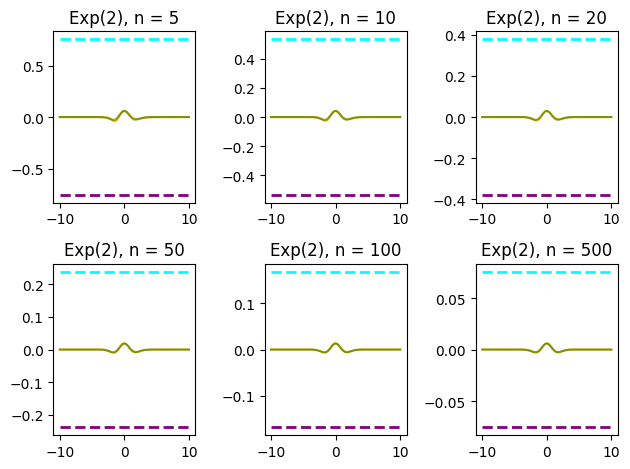

In [ ]:
############################## EXPONENTIAL ################################
lambda_test = 2
rate = 1/lambda_test
fig2, ax = plt.subplots(2,3)
r = sts.expon.rvs(scale = rate, size=1000)
def asympt(x, skewness, n):
    return skewness / (6 * np.sqrt(n))*(1-x**2)*sts.norm.pdf(x)
def calculate_n_exp(n, rate, ax, i, j):
    Berry_Essen_right = 0.4784 * (np.absolute(r - r.mean())**3).mean() / (np.sqrt(n)*(sts.expon(scale = rate).var()**(3/2)))
    disp = np.sqrt(n*sts.expon(scale = rate).var())
    x_values = np.linspace(-10, 10, 100)
    y = sts.gamma.cdf(x_values*disp + rate*n, a = n, scale = rate) #max из этого и нуля
    ax[i,j].plot(x_values,  y - sts.norm.cdf(x_values, loc = 0, scale = 1), label = "F_y(x) - Ф(х)", color='orange')
    ax[i,j].hlines(y=Berry_Essen_right, xmin=-10,xmax=10, ls='--', label = "BEr",lw=2, color = 'cyan')
    ax[i,j].hlines(y=-Berry_Essen_right, xmin=-10,xmax=10, ls='--', label = "-BEr",lw=2, color = 'purple')
    ax[i,j].set_title("Exp(%d), n = %d"%(lambda_test,n))
    sk = sts.expon(scale = rate).stats('s')
    ax[i,j].plot(x_values, asympt(x_values, sk, n), alpha = 0.5, color = 'green')
calculate_n_exp(5,rate,ax,0,0)
calculate_n_exp(10,rate,ax,0,1)
calculate_n_exp(20,rate,ax,0,2)
calculate_n_exp(50,rate,ax,1,0)
calculate_n_exp(100,rate,ax,1,1)
calculate_n_exp(500,rate,ax,1,2)
plt.tight_layout()
plt.show()
